# Hands-On Exercise 6.2:
# Working With a Neural Network Using Python
***

## Objectives

#### In this exercise, you will work with a neural network using Python. This exercise allows you to predict a target variable from a number of predictor variables. The goal is to show you how neural networks can be used to predict unknown values from a model trained on an existing data set.

### Overview

You will work on a data set called wines that you will import from a csv file. 

You will:<br>
● Review the distribution of the target variable and transform it into a format suitable for use with a neural network<br>
● Examine the predictor variables<br>
● Train a neural network that can be used to make future predictions<br><br>

**Pre-step: Execute the following cell in order to suppress warning messages**

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Major Step 1: Data loading and text preprocessing**

1. ❏ Import the **pandas** package

In [3]:
import pandas as pd

2. ❏ Import the **wines.csv** dataset into a dataframe

In [4]:
data = pd.read_csv("wines.csv")

3. ❏ View the columns in the dataframe 

In [5]:
data.columns

Index(['label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280_OD315_of_diluted_wines', 'Proline'],
      dtype='object')

4. ❏ View a preview of the wines dataframe

In [6]:
data.head()

,label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data.label.unique()

array([1, 2, 3], dtype=int64)

In [43]:
print(data.shape)
data.shape[1]

(178, 14)


14

In [45]:
data.iloc[:, 1:data.shape[1]]

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


5. ❏ Normalize the data in the dataframe through scaling using the **MinMaxScaler** library from **sklearn.preprocessing**<br><br>
*Info: MinMaxScaler rescales the data set such that all feature values are in the range 0 to 1*

In [46]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
# dataScaled = pd.DataFrame(preprocessing.minmax_scale(data), columns=data.columns)
dataScaled = pd.DataFrame(scaler.fit_transform(data.iloc[:, 1:data.shape[1]]), columns=data.iloc[:, 1:data.shape[1]].columns)

6. ❏ View the scaled data

In [47]:
dataScaled

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


7. ❏ One hot encode the target variable into three separate variables. Use the prefix **label** for each of the column names

In [48]:
oneHotEncoding = pd.get_dummies(data.label, prefix="label", prefix_sep="_", drop_first=False)
oneHotEncoding

# dataScaled = dataScaled.drop(columns=["label"]).join(dummies)
# dataScaled

,label_1,label_2,label_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


8. ❏ Split the dataset into a training and test dataset using the **train_test_split()** function from **sklearn.model_selection**

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataScaled, oneHotEncoding, test_size=0.25, random_state=42)

9. ❏ Examing the size of the resulting 4 datasets using the **.shape** attribute

In [50]:
X_train.shape

(133, 13)

In [51]:
X_test.shape

(45, 13)

In [52]:
y_train.shape

(133, 3)

In [53]:
y_test.shape

(45, 3)

10. ❏ Instantiate a neural net model. Experiment with hidden layer sizes. (eg.10,10,10). Use a **tanh** activation function

In [54]:
from sklearn.neural_network import MLPClassifier

In [69]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42, activation='tanh')
clf.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 10, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

11. ❏ Train the model with the training datasets (the prediction dataset and the target dataset)

In [56]:
clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10, 10),
              random_state=42)

12. ❏ Using the trained model, generate predictions for the test dataset

In [ ]:
y_pred = clf.predict(X_test)
y_pred

In [59]:

y_test.values.argmax(axis=1)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2], dtype=int64)

13. ❏ Build a **confusion matrix**

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

y_test.values.argmax()
confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

array([[15,  0,  0],
       [ 3, 15,  0],
       [ 0,  1, 11]], dtype=int64)

14. ❏ Build a **classification report** for the predictions

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.94      0.83      0.88        18
           2       1.00      1.00      1.00        12

   micro avg       0.95      0.91      0.93        45
   macro avg       0.96      0.92      0.94        45
weighted avg       0.95      0.91      0.93        45
 samples avg       0.90      0.91      0.90        45



In [ ]:
dataScaled.boxplot()

In [ ]:
dataScaled.corr()

In [ ]:
import seaborn as sea
sea.pairplot(dataScaled)

In [75]:
dataScaled.columns.shape[0]

13

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=dataScaled.columns.shape[0])
pca.fit(dataScaled)

PCA(n_components=13)

In [77]:
pca.explained_variance_

array([0.2200922 , 0.10246084, 0.04624247, 0.04011226, 0.03005877,
       0.02516286, 0.01978926, 0.01301012, 0.01228411, 0.01215769,
       0.0074605 , 0.00687688, 0.00440241])

In [78]:
pca.explained_variance_ratio_

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280_OD315_of_diluted_wines', 'Proline'],
      dtype='object')


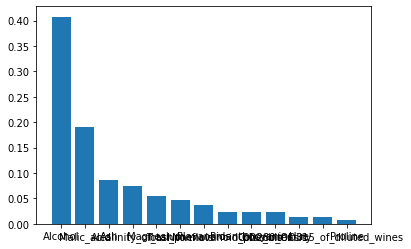

In [82]:
plt.bar(dataScaled.columns, pca.explained_variance_ratio_)
print(dataScaled.columns)

In [84]:
#Saving the model
import pickle
pickle.dump(clf, open("clf20220324.pkl", 'wb'))

In [87]:
#We can serialize the object in a binary string
saved_clf = pickle.dumps(clf)
type(saved_clf)

bytes

In [88]:
#Read the data. Be careful where you read the file from, because executable code can be stored in pickle data
fredie = pickle.load(open("clf20220324.pkl", 'rb'))
type(fredie)

sklearn.neural_network._multilayer_perceptron.MLPClassifier

In [104]:
from sklearn.model_selection import GridSearchCV
import numpy as np


In [105]:
np.arange(0, 42)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

In [106]:
params = {
    'hidden_layer_sizes': [(10,10,10), (10,10), (10), (8,8,8), (12,12,12)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'random_state' : np.arange(0, 42)
    }

clf_grid = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

In [107]:
clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2520 candidates, totalling 12600 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=5,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 10, 10), (10, 10), 10,
                                                (8, 8, 8), (12, 12, 12)],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41]),
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=1)

In [108]:
clf_best = clf_grid.best_estimator_
clf_best

MLPClassifier(activation='logistic', hidden_layer_sizes=(8, 8, 8),
              random_state=28, solver='lbfgs')

In [109]:
y_pred_best = clf_best.predict(X_test)
y_pred_best

confusion_matrix(y_test.values.argmax(axis=1), y_pred_best.argmax(axis=1))

array([[15,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 12]], dtype=int64)

## <center>**Congratulations! You have completed the exercise.**</center>

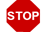

# <center>**This is the end of the exercise.**</center>